## Matplotlib - Estudos e Anotações

Documentação: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

### Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 ### Criando um gráfico de linha básico

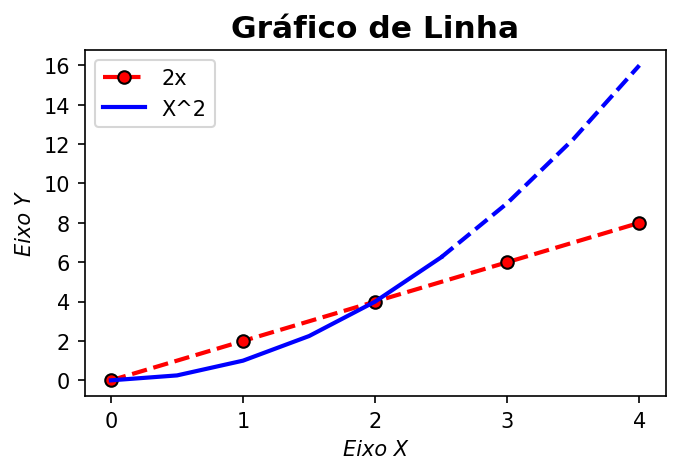

In [2]:
x = np.array([0,1,2,3,4]) 
y = np.array([0,2,4,6,8])

# A função 'figure' recebe como parâmetro 'figsize' e 'dpi'
# que respectivamente redimensiona e altera a resolução do gráfico:
plt.figure(figsize=(5,3), dpi=150)

# A função 'plot' traça a linha o gráfico, recebendo os arrays 'x' e 'y' criados acima como escala dos
# respectivos eixos e os parâmetros de customização:

# plt.plot(x,y, label='2x', color='red', linewidth=3, linestyle='--', marker='.', markersize=12,
#          markeredgecolor='black')

# Também é possível usar o parâmetro Format Strings (fmt) para customizar cor, estilo de marcador e linha
# ('[color][marker][line]'):
plt.plot(x,y, 'r.--', label='2x', linewidth=2, markersize=12, markeredgecolor='black')

### Criando uma segunda linha
x2 = np.arange(0,4.5,0.5)

# As duas funções 'plot' abaixo traçam a segunda linha. Porém a segunda função determina o linestyle
# como trastejado ('--'), no intervalo da escala passada abaixo, dando uma ideia de projeção:
plt.plot(x2[:6], x2[:6]**2,'b', label='X^2', linewidth=2) 
plt.plot(x2[5:], x2[5:]**2, 'b--', linewidth=2)

# A função 'title' define um título para o gráfico. Também recebe como parâmetro um dicionário
# ('fontdict'), por onde é possível customizar o título.
plt.title('Gráfico de Linha', fontdict={'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'}) 

# A função 'xlabel' define e customiza uma label para o eixo X.
plt.xlabel('Eixo X', fontdict={'fontname': 'Arial', 'style': 'italic'})

# A função 'ylabel' define e customiza uma label para o eixo Y.
plt.ylabel('Eixo Y', fontdict={'fontname': 'Arial', 'style': 'italic'}) 

# As funções 'xticks' e 'yticks' permitem definir os valores na escala de cada eixo.
plt.xticks(np.array([0,1,2,3,4]))
plt.yticks(np.arange(0,18,2))

# A função 'legend' executa a legenda do gráfico.
plt.legend()

# A função 'show' executa o gráfico.
plt.show()

### Criando um gráfico de barra básico

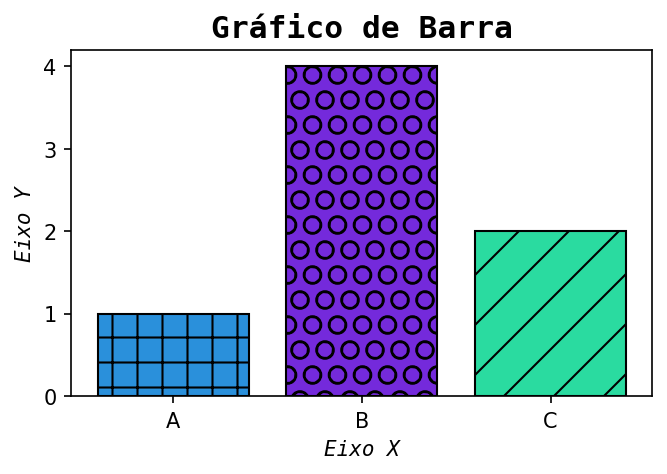

In [3]:
labels = np.array(['A', 'B', 'C'])
values = np.array([1,4,2])

plt.figure(figsize=(5,3), dpi=150)

# O parâmetro 'hatch' permite adicionar marcadores (desenhos) às barras. Já os parâmetros 'color' e 
# 'edgecolor' permitem definir as cores das barras e de suas bordas, respectivamente.
bars = plt.bar(labels, values, hatch = np.array(['+','O','/']), 
               color = np.array(['#2A90DB','#742ADB','#2ADBA0']), edgecolor='black') 

plt.title('Gráfico de Barra', fontdict={'fontname': 'monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Eixo X', fontdict={'fontname': 'monospace', 'style': 'italic'})
plt.ylabel('Eixo Y', fontdict={'fontname': 'monospace', 'style': 'italic'})

plt.show()

## Exemplos com datasets

### Gráfico de Linha

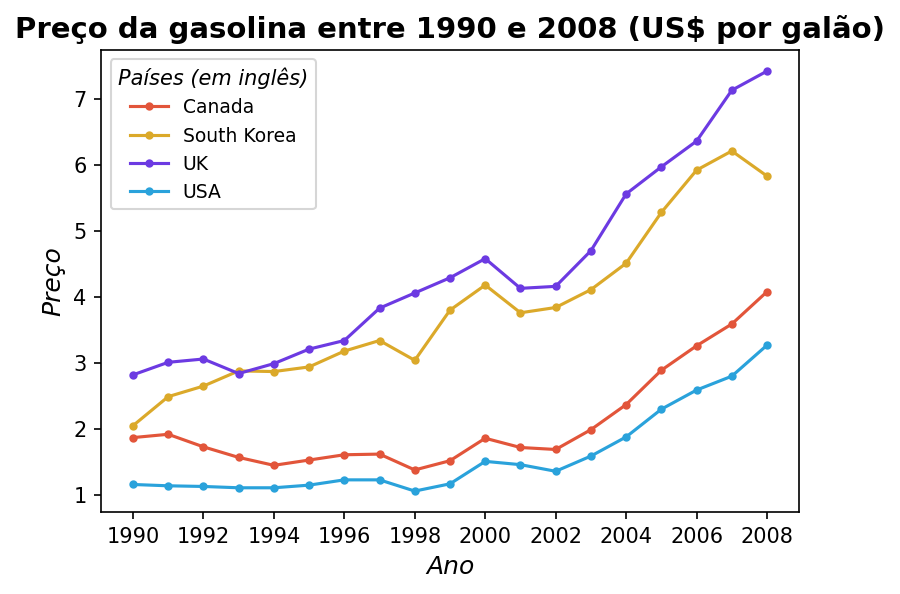

In [4]:
# Importa os dados
gas_df = pd.read_csv('/kaggle/input/gas-prices-csv/gas_prices.csv')

plt.figure(figsize=(6,4), dpi=150)

plt.title('Preço da gasolina entre 1990 e 2008 (US$ por galão)', 
          fontdict={'fontname': 'Calibri', 'fontweight': 'bold','fontsize': 14})
plt.xlabel('Ano', fontdict={'fontname': 'Calibri', 'fontsize': 12, 'weight': 'light', 'style': 'italic'})
plt.ylabel('Preço', fontdict={'fontname': 'Calibri', 'fontsize': 12, 'weight': 'light', 'style': 'italic'})

# O slicing abaixo serve para pular cada 2 anos nos ticks do eixo X
plt.xticks(gas_df['Year'][::2], fontname='Calibri') 
plt.yticks(fontname='Calibri')

plt.plot(gas_df['Year'], gas_df['Canada'], '.-', color='#E2553A', label='Canada')
plt.plot(gas_df['Year'], gas_df['South Korea'], '.-', color='#DBA92A', label='South Korea')
plt.plot(gas_df['Year'], gas_df['UK'], '.-', color='#6C3AE2', label='UK')
plt.plot(gas_df['Year'], gas_df['USA'], '.-', color='#2AA2DB', label='USA')

# Executa a legenda recebendo parâmetros de formatação
plt.legend(title='Países (em inglês)', title_fontproperties={'family': 'Calibri', 'size': 10,
                                                            'style': 'italic'}, prop={'family': 'Calibri',
                                                                                     'size':9}) 

# A função 'savefig' salva o gráfico localmente.
plt.savefig('gas-price-graph1.png', bbox_inches='tight', dpi=300)
plt.show()

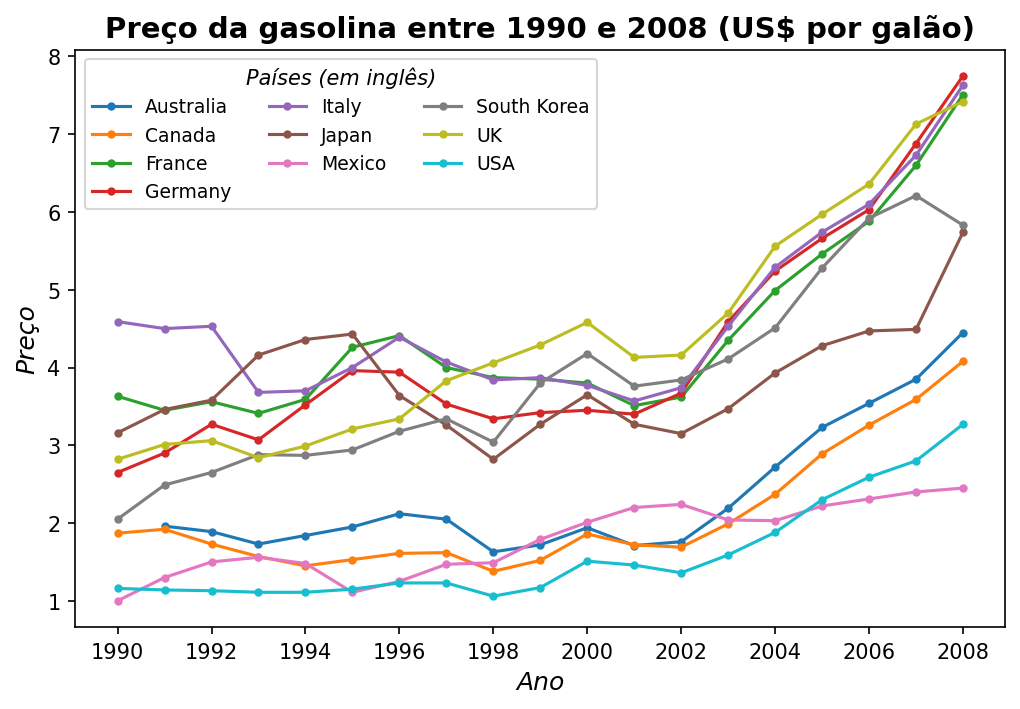

In [5]:
# Caso quiséssemos visualizar os dados de todos os países no dataframe, teríamos a opção de
# plotar o gráfico em um for loop:

plt.figure(figsize=(8,5), dpi=150)

plt.title('Preço da gasolina entre 1990 e 2008 (US$ por galão)', 
          fontdict={'fontname': 'Calibri', 'fontweight': 'bold','fontsize': 14})
plt.xlabel('Ano', fontdict={'fontname': 'Calibri', 'fontsize': 12, 'weight': 'light','style': 'italic'})
plt.ylabel('Preço', fontdict={'fontname': 'Calibri', 'fontsize': 12, 'weight': 'light', 'style': 'italic'})

plt.xticks(gas_df['Year'][::2], fontname='Calibri') 
plt.yticks(fontname='Calibri')

######################################################################
for country in gas_df:
    if country != 'Year':
        plt.plot(gas_df['Year'], gas_df[country], '.-', label=country)
######################################################################

plt.legend(title='Países (em inglês)', title_fontproperties={'family':'Calibri', 'size': 10,
                                                            'style': 'italic'},
           prop={'family':'Calibri','size': 9}, ncols=3)
plt.savefig('gas-prices-graph2.png', bbox_inches='tight', dpi=300)
plt.show()

In [6]:
# Obs.: Também é possível fazer o mesmo passando um array de países no for loop, ao invés de um df

### Histograma

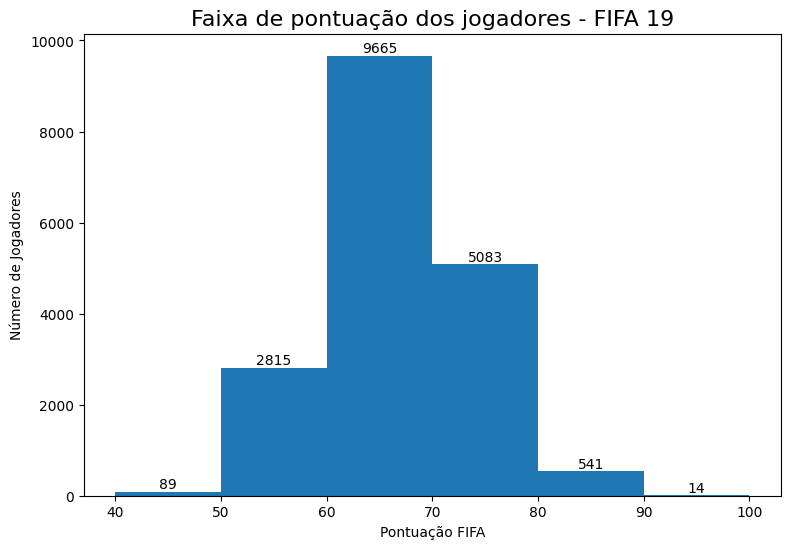

In [7]:
# Conjunto de dados dos jogadores no jogo FIFA 19
# Contagem de jogadores nas faixas de pontuação do jogo (0~100)
fifa_df = pd.read_csv('/kaggle/input/fifa-2019-data/fifa_data.csv')

bins = np.arange(40,101,10)

plt.figure(figsize=(9,6), dpi=100)
values, edges, patches = plt.hist(fifa_df['Overall'], bins=bins)
plt.bar_label(patches)
plt.xticks(bins)

plt.title('Faixa de pontuação dos jogadores - FIFA 19', fontdict={'size': 16})
plt.xlabel('Pontuação FIFA')
plt.ylabel('Número de Jogadores')

plt.show()

### Gráfico de pizza

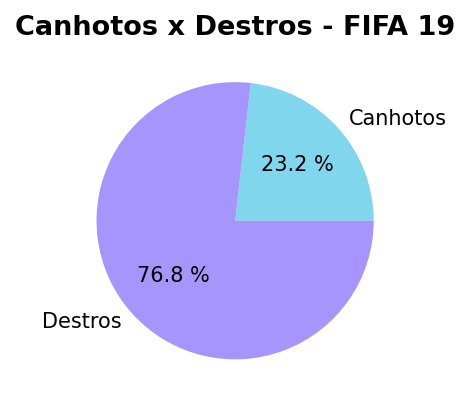

In [8]:
# Distribuição de canhotos vs. número de destros no FIFA 19
left_foot = fifa_df.loc[fifa_df['Preferred Foot'] == 'Left'].count()[0]
right_foot = fifa_df.loc[fifa_df['Preferred Foot'] == 'Right'].count()[0]

labels=['Canhotos','Destros']
colors=['#80d7ed', '#a695fc']

plt.figure(figsize=(4,3), dpi=150)
plt.title('Canhotos x Destros - FIFA 19', fontdict={'fontsize': 13, 'weight': 'bold'})
plt.pie([left_foot, right_foot], labels=labels, colors=colors, autopct='%.1f %%')
plt.show()

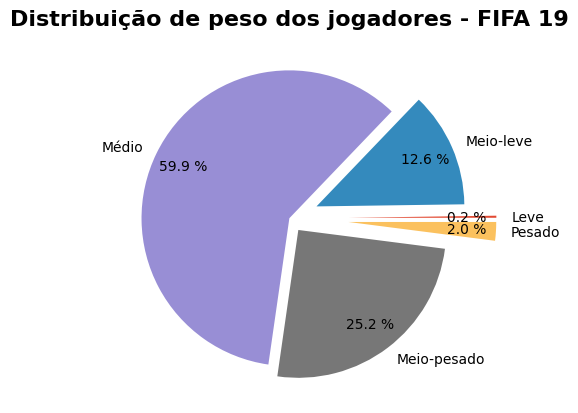

In [9]:
# Distribuição de peso dos jogadores

# List comprehension para varrer a coluna 'Weight', remover a string 'lbs' (sigla da unidade de peso
# libras) de cada item e convertê-los para inteiro.
fifa_df['Weight'] = [int(x.strip('lbs')) if type(x)==str else x for x in fifa_df['Weight']]

plt.style.use('ggplot') # Usando o estilo gráfico do ggplot, framework da linguagem R 

# Usando a função 'loc' do Pandas para retornar a contagem dos jogadores dentro de cada
# faixa de peso.
light = fifa_df.loc[fifa_df['Weight'] < 125].count()[0]
light_medium = fifa_df.loc[(fifa_df['Weight'] >= 125) & (fifa_df['Weight'] < 150)].count()[0]
medium = fifa_df.loc[(fifa_df['Weight'] >= 150) & (fifa_df['Weight'] < 175)].count()[0]
medium_heavy = fifa_df.loc[(fifa_df['Weight'] >= 175) & (fifa_df['Weight'] < 200)].count()[0]
heavy = fifa_df.loc[fifa_df['Weight'] >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Leve', 'Meio-leve', 'Médio', 'Meio-pesado', 'Pesado']
explode = (0.4,0.2,0,0.1,0.4)

# O parâmetro 'pctdistance' altera a distância das labels de porcentagem no gráfico
# O parâmetro 'explode' afasta as fatias em um gráfico de pizza
plt.pie(weights, labels=labels, autopct='%.1f %%', pctdistance=0.8, explode=explode)
plt.title('Distribuição de peso dos jogadores - FIFA 19', fontdict={'fontsize': 16, 'weight': 'bold'})

plt.show()

#### Diagrama de caixa (box plot)

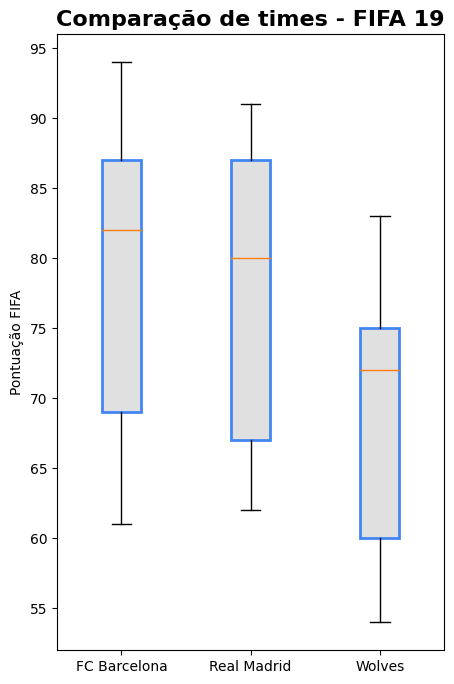

In [10]:
# Comparação de três times, com base na pontuação de seus jogadores no FIFA 19
plt.style.use('default') # Retornando ao estilo gráfico padrão

plt.figure(figsize=(5,8))

barcelona = fifa_df.loc[fifa_df['Club'] == 'FC Barcelona']['Overall']
madrid = fifa_df.loc[fifa_df['Club'] == 'Real Madrid']['Overall']
wolves = fifa_df.loc[fifa_df['Club'] == 'Wolverhampton Wanderers']['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'Wolves']

# É necessário o parâmetro 'patch_artist' dentro da função 'boxplot' para alterar a
# cor interna das caixas
boxes = plt.boxplot([barcelona, madrid, wolves], labels=labels, patch_artist=True)

for box in boxes['boxes']:
    # Muda a cor interna, a cor e a largura das bordas
    box.set(color='#4286f4', linewidth=2, facecolor='#e0e0e0')

plt.title('Comparação de times - FIFA 19', fontdict={'fontsize': 16, 'weight': 'bold'})
plt.ylabel('Pontuação FIFA')

plt.savefig('fifa-team-comparison.png', bbox_inches='tight', dpi=300)
plt.show()